<a href="https://colab.research.google.com/github/sakshamsharma57/CreditRiskAnalysis/blob/main/CreditRiskAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [52]:

    df = pd.read_csv('/content/bankloans (1).csv')

    df.head()


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [53]:
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [54]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
22   1   4       3        14      17.5     0.225400  2.224600  0.0        1
                 2        24      15.6     1.636128  2.107872  1.0        1
                 1        16      1.2      0.084480  0.107520  0.0        1
         1       3        17      18.6     0.806310  2.355690  0.0        1
                 0        18      4.4      0.270072  0.521928  0.0        1
Name: count, Length: 700, dtype: int64

In [55]:
df = df.dropna()

<Axes: xlabel='age', ylabel='income'>

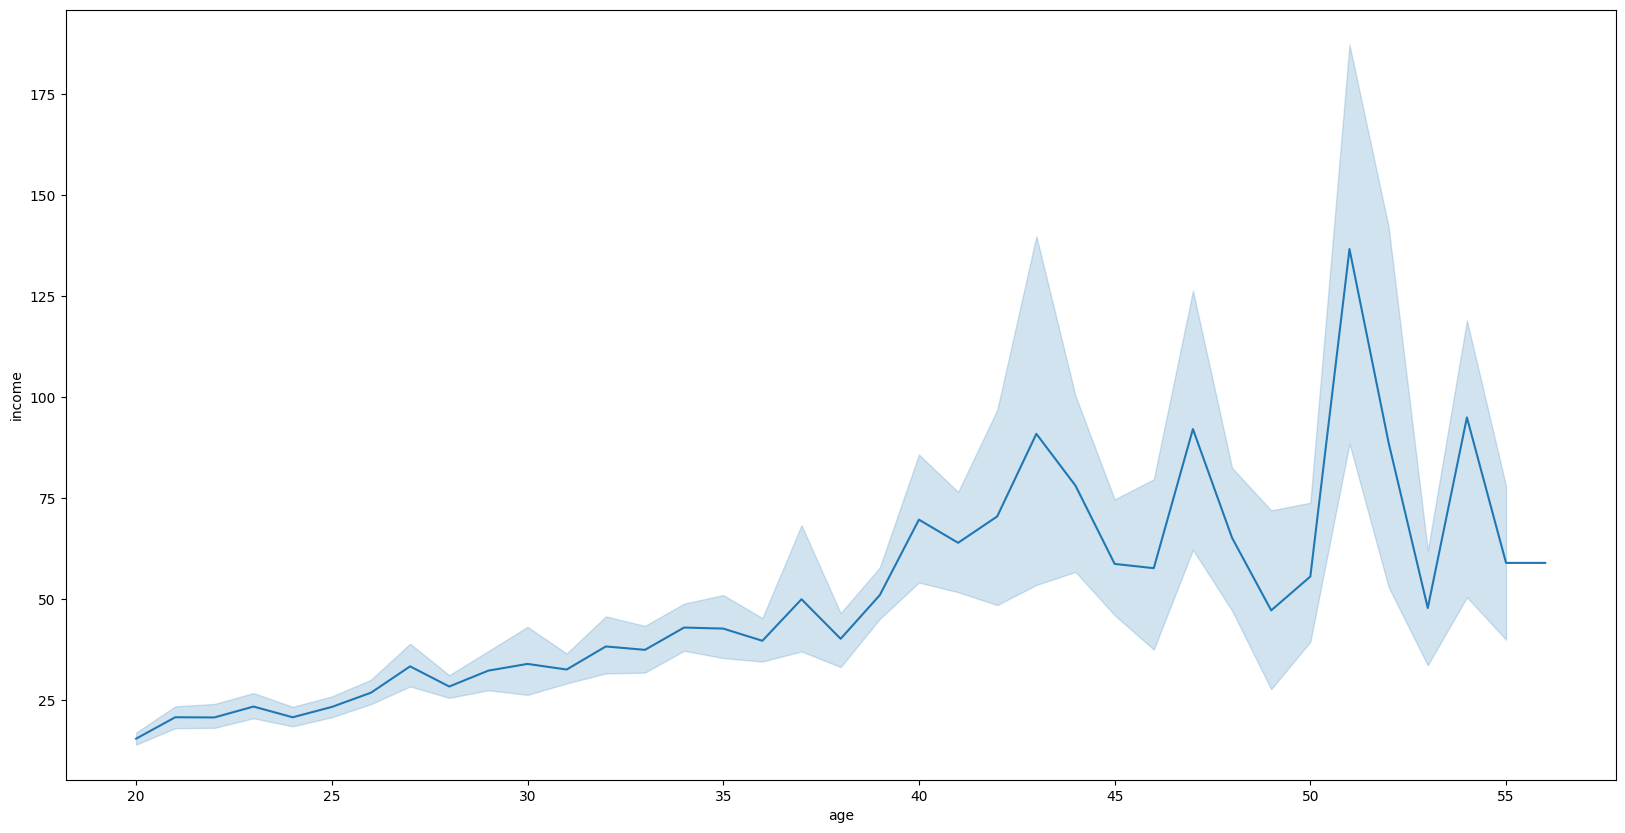

In [56]:
fig,ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = 'age', y = 'income', data = df, ax = ax)

<Axes: xlabel='age', ylabel='debtinc'>

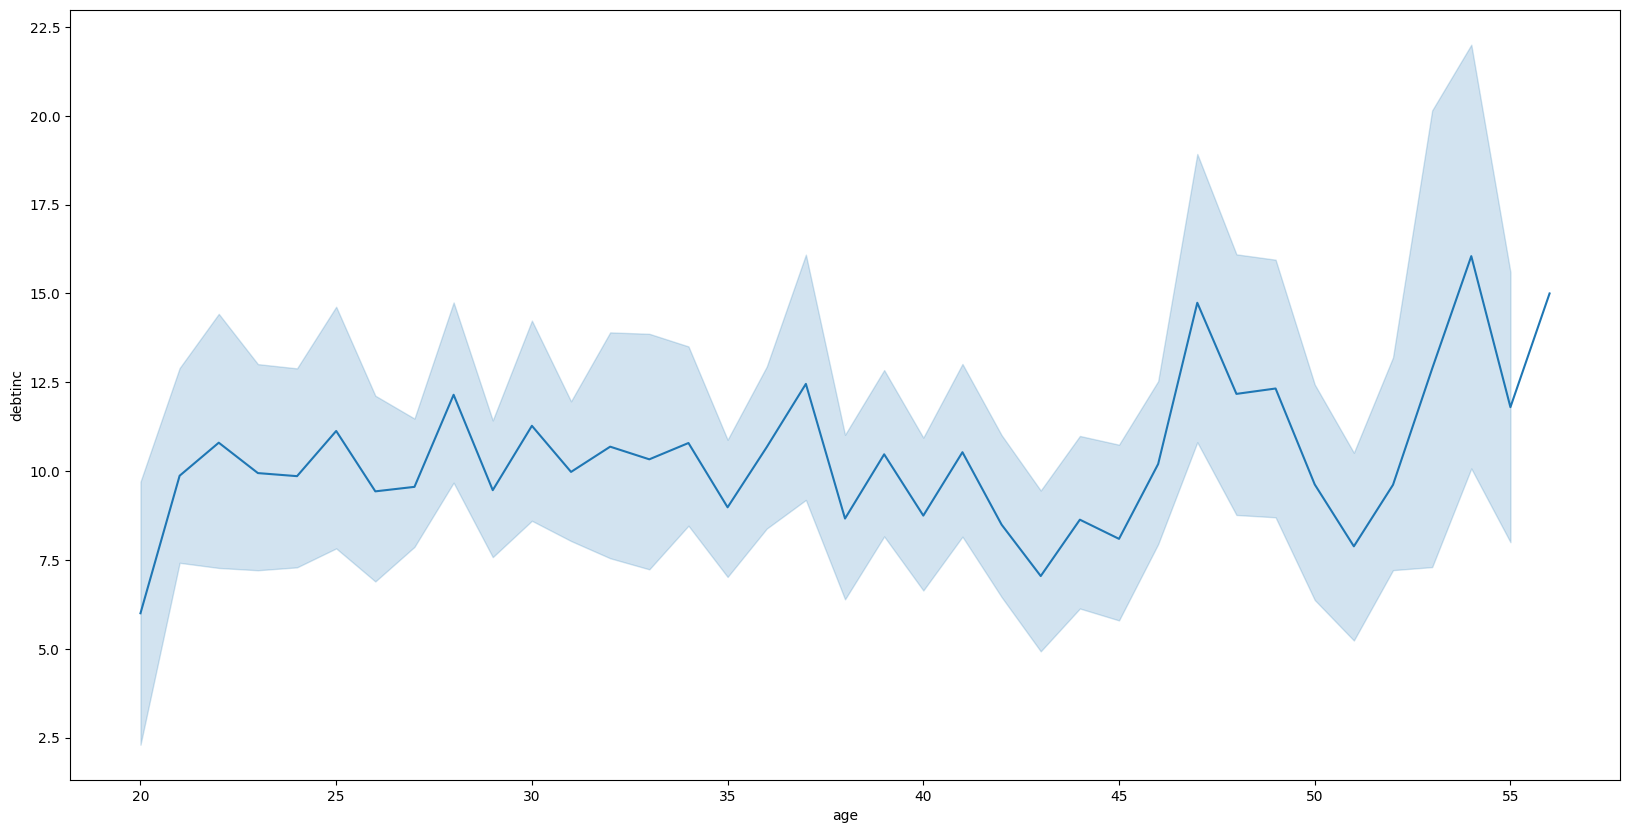

In [57]:
fig,ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = 'age', y = 'debtinc', data = df, ax = ax)

In [58]:
df['default'].value_counts()

,count
default,
0.0,517
1.0,183


In [59]:
x = df.drop('default', axis = 1)
y = df['default']

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [61]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# **CREATING MODELS**

# **RandomForest Algorithm**

In [62]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [63]:
rf.score(xtest, ytest)

0.8071428571428572

In [64]:
rf2 = cross_val_score(estimator = rf, X = xtrain, y = ytrain, cv = 10)
rf2.mean()

np.float64(0.7821428571428571)

# **SVM Algorithm**

In [65]:
svc = SVC()
svc.fit(xtrain, ytrain)

SVC()

In [66]:
svc.score(xtest,ytest)

0.8071428571428572

In [67]:
model = GridSearchCV (svc, {
    'C': [0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma': [0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel': ['rbf','linear']
},scoring='accuracy', cv=10)

In [68]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [69]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [70]:
model2 = SVC(C = 0.1, gamma = 0.1, kernel = 'rbf')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.7285714285714285

# **Logistic Regression**

In [71]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8571428571428571

<Axes: >

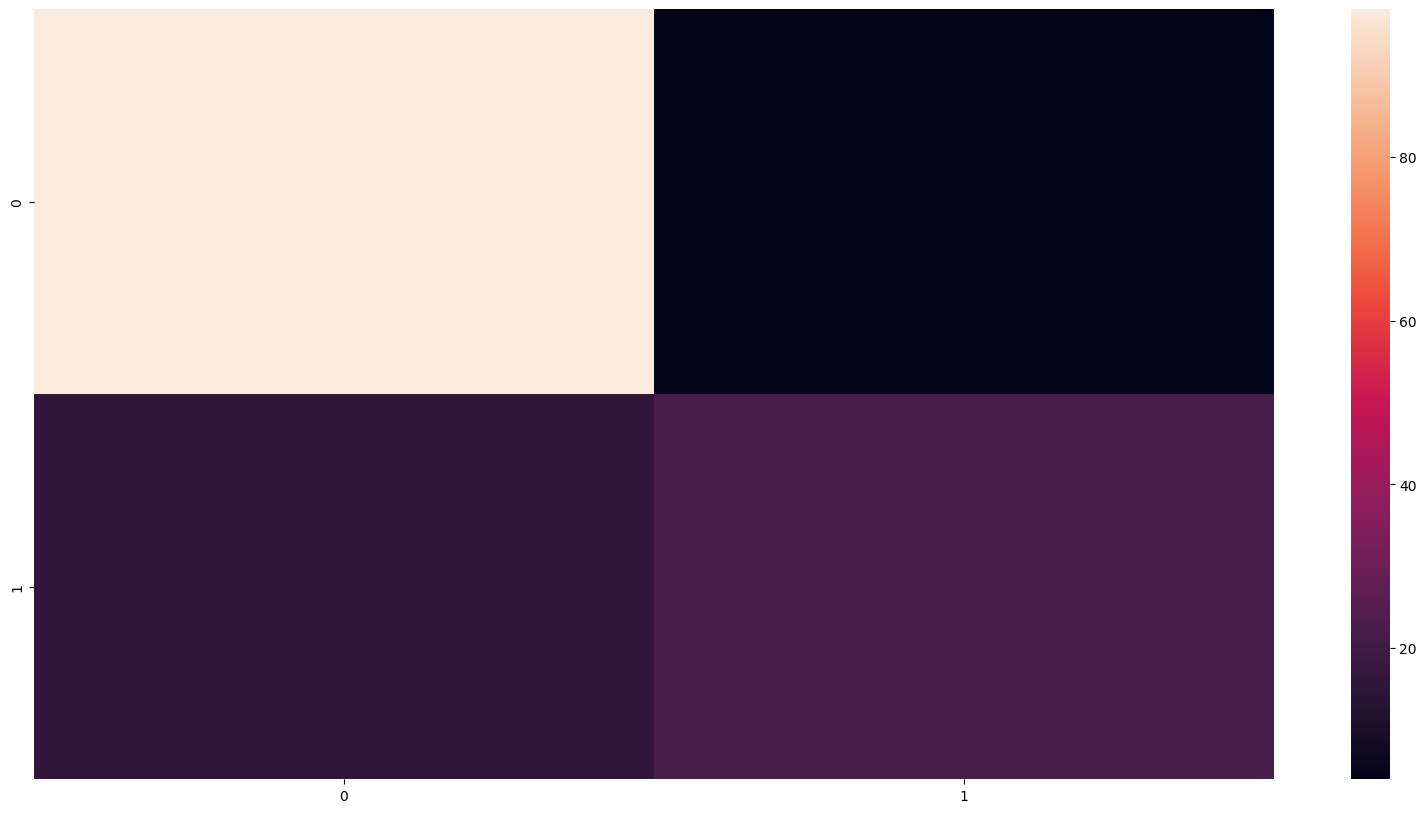

In [72]:
yp = lr.predict(xtest)
c = confusion_matrix(ytest,yp)
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(c, ax = ax)

In [73]:
# # prompt: give score to each customer based on PD. High PD people getting low score and low PD people getting high score

# # Get the predicted probabilities from the Logistic Regression model
# # This gives the probability of default (class 1)
# pd_probs = lr.predict_proba(xtest)[:, 1]

# # Assign a score based on the inverse of the probability of default.
# # A higher probability of default results in a lower score.
# # We can scale this to a desired range if needed, but a simple inverse or
# # a scaled inverse works. Here we use 1 - pd_probs to get a score between 0 and 1.
# # Multiply by 100 to get a score out of 100.
# customer_scores = (1 - pd_probs) * 100

# # You can now associate these scores with the customers in the test set.
# # For example, you can create a DataFrame to store the customer index (from xtest) and their score.
# # If you need to associate with the original customer identifiers, you would need to keep
# # track of the original indices during the train-test split.
# # Assuming xtest corresponds to the rows in the original df after splitting and scaling:

# # Get the indices of the test set from the original dataframe
# test_indices = ytest.index

# # Create a DataFrame to hold the scores
# customer_scores_df = pd.DataFrame({
#     'Original_Index': test_indices,
#     'PD_Probability': pd_probs,
#     'Customer_Score': customer_scores
# })

# # Display the first few scores
# print(customer_scores_df.head())
